First very simple Dense network, with 1 hidden layer.
Start from here to improve the model in later iterations
2 layers:
- first layer : 64 units, sigmoid
- Output: 10 units, softmax

Import packages

In [3]:
#numpy: Numeric library
import numpy as np 
#graphics
from matplotlib import pyplot as plt

#tensorflow: use some TF tools
import tensorflow as tf
#Keras: Deep learning API. In TF 2.x, it is included in TF
from tensorflow import keras
#Import Dense layer
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras import Model
#Optimizers: SGD (Stochastic Gradien Descent)
#from tensorflow.keras.optimizers import SGD as sgd

#import data set MNIST
from tensorflow.keras.datasets import mnist

Some verifications

In [4]:
#TF
print(np.random.uniform())

0.4953555286931104


Import MNIST data set
60000 training examples
10000 validation examples
1 example = 28 * 28 matrix (image with 28 * 28 pixels)


In [5]:
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()


In [6]:
print(x_train.shape)


(60000, 28, 28)


In [7]:
print(y_train.shape)

(60000,)


In [8]:
print(x_train[0].shape)

(28, 28)


In [9]:
print(y_train)
print(y_train.size)

[5 0 4 ... 5 6 8]
60000


In [10]:
print(x_valid.shape)
print(y_valid.shape)

(10000, 28, 28)
(10000,)


Process & Prepare data
Flattening Input data:
Input data (x_train[i]) should be a vector of real values
- From shape (60000, 28, 28) to shape (60000, 28 * 28)
- Convert to float32 (default is uint8, which python will convert to float64) (flaot 32 will take less memory)

In [11]:
#print(x_train[0])

In [12]:
#x_train.reshape(60000, 784).astype('float32')

In [13]:
#use numpy reshape
x_train = np.reshape(x_train, (60000, 28 * 28)).astype('float32')
x_valid = np.reshape(x_valid, (10000, 28 * 28)).astype('float32')

In [14]:
print(x_train.shape)
print(x_valid.shape)

(60000, 784)
(10000, 784)


Prepare Data (2)
divide by 255, so the values will range from 0 to 1


In [15]:
#print(x_train)
x_train /=  255
x_valid /=  255

In [16]:
#print(x_train[0])

Prepare labels (y_train and y_valid)
y_train[i] is given as a number (0, 9). We have 10 possible values. 
Convert to one-hot format:
0 => [1, 0, 0, 0, 0,0, 0,0, 0,0]
1 => [0, 1, 0, 0, 0,0, 0,0, 0,0]
9 => [0, 0, 0, 0, 0,0, 0,0, 0,1]

In [17]:
n_classes = 10
print(y_train[0])
y_train = keras.utils.to_categorical(y_train, n_classes)
print(y_train[0])

print(y_valid[0])
y_valid = keras.utils.to_categorical(y_valid, n_classes)
print(y_valid[0])


5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


Define Neural Network Architecture
Using Keras API

In [18]:
# Sequential: model of type sequential (layer n can pass information only to layer n+1)
model = Sequential()
model.to_json()

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": []}, "keras_version": "2.2.4-tf", "backend": "tensorflow"}'

In [19]:
#Define activations
sigmoid = keras.activations.sigmoid
softmax = keras.activations.softmax

#define loss function: Cross entropy
loss = keras.losses.categorical_crossentropy

#define metrics
metrics = [keras.metrics.Accuracy()]

#define optimizer
sgd=keras.optimizers.SGD(lr=0.01)
tf.print(sgd.lr)

0.01


In [20]:
#define First layer
inputSize = 28 * 28 # size of input vector
nbUnits = 64 #Number of input layer units (artificial neuron)
firstLayer = Dense(nbUnits, activation=  sigmoid, input_shape=(inputSize,))
model.add(firstLayer)

In [21]:
#define Output layer
 
outputUnits = 10 #Number of output layer units (artificial neuron)
# output shape will be inferred
outputLayer = Dense(outputUnits, activation=  softmax)
model.add(outputLayer)

In [22]:
#compile Model
model.compile(loss=loss, 
         optimizer=sgd,
         metrics=['accuracy'])

In [23]:
# print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


TensorBoard

In [24]:
from tensorflow.keras.callbacks import TensorBoard
import os 
import datetime
if not os.path.exists('logs/crossEntropy'):
   os.mkdir('logs/crossEntropy')
log_dir = "logs/crossEntropy/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
print(log_dir)
os.mkdir(log_dir)
 
tensorBoard = TensorBoard(log_dir, histogram_freq=1,profile_batch = 100000000)

logs/crossEntropy/20200229-134439


In [25]:
# Train
batch_size = 128
nb_epoch = 20
history=model.fit(x_train, y_train, batch_size= batch_size, epochs = nb_epoch, verbose=1, validation_data=(x_valid, y_valid),
callbacks=[tensorBoard])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 46us/sample - loss: 2.0809 - accuracy: 0.4539 - val_loss: 1.8286 - val_accuracy: 0.6623
Epoch 2/20
60000/60000 [==============================] - 2s 27us/sample - loss: 1.6397 - accuracy: 0.6952 - val_loss: 1.4362 - val_accuracy: 0.7407
Epoch 3/20
60000/60000 [==============================] - 2s 30us/sample - loss: 1.3041 - accuracy: 0.7560 - val_loss: 1.1511 - val_accuracy: 0.7868
Epoch 4/20
60000/60000 [==============================] - 1s 25us/sample - loss: 1.0705 - accuracy: 0.7916 - val_loss: 0.9607 - val_accuracy: 0.8173
Epoch 5/20
60000/60000 [==============================] - 2s 26us/sample - loss: 0.9135 - accuracy: 0.8148 - val_loss: 0.8315 - val_accuracy: 0.8339
Epoch 6/20
60000/60000 [==============================] - 2s 26us/sample - loss: 0.8048 - accuracy: 0.8296 - val_loss: 0.7402 - val_accuracy: 0.8470
Epoch 7/20
60000/60000 [==============================] 

Plot History

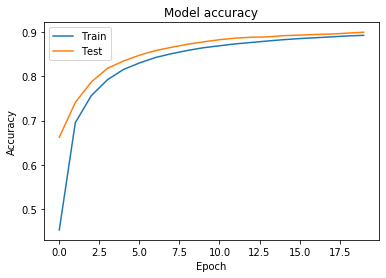

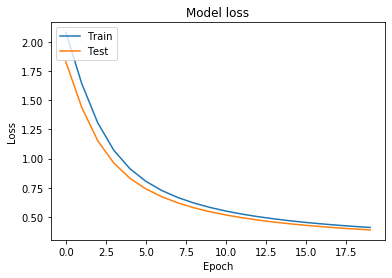

In [28]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [27]:
# summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


End